<a href="https://colab.research.google.com/github/mcarrete42/KCL_AIML/blob/master/05_DeepLearning_MNIST_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To explore this ipython notebook, press `SHIFT+ENTER` to progress to the next cell. Feel free to make changes, enter code, and hack around. You can create new code cells by selecting `INSERT->Insert Cell Below`

# MNIST Example (Part 1)

MNIST is a computer vision dataset consisting of 70,000 images of handwritten digits. Each image has 28x28 pixels for a total of 784 features, and is associated with a digit between 0-9.

<img src="http://corpocrat.com/wp-content/uploads/2014/10/figure_1.png" width=200px>


In this exercise, you will construct a deep convolutional network to recognize each image. Note that this exercise assumes some basic familiarity with python and machine learning.

In [ ]:
from __future__ import print_function

import keras
import numpy as np
from tensorflow import keras
from keras import layers

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop

batch_size = 32
num_classes = 10
epochs = 10

The MNIST dataset can be found on Yann LeCunn’s website.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


## Model specification
Training a deep learning model requires, among other things:
* Specifying the dataset
* Building a model from a list of layers
* Cost function
* Learning rule. 

Here we guide you through each item in turn.

### Initializing weights
There are many ways of initializing weight matrices. In this tutorial, we initialize the weights using a Glorot Uniform initialiser (draws from a specific uniform distribution) or a Random Normal, and we initialize the bias using zeros.

In [ ]:
#kernel_initializer = keras.initializers.GlorotUniform()
kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
bias_initializer = keras.initializers.Zeros()

### Model architecture
The model is specified as a list of layers. For classifying MNIST images, we use a Convolutional Network as below



In [ ]:
input_size = x_train.shape[1:]

model = Sequential()

model.add(keras.Input(shape = input_size))
model.add(layers.Conv2D(filters=20, kernel_size=5, padding='same',activation='relu', # Using filters=32 and kernel_size=3 is more often used
                        kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# OPTION 1: ADD THESE LAYERS AND SEE HOW MANY PARAMETERS AND HOW MUCH ACCURACY YOU GET, COMMENT THE ONES IN OPTION 2
#-------------------------------------------
#model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu',
#                       kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#-------------------------------------------

model.add(layers.Flatten()) # YOU ALWAYS KEEP THIS FOR CONV NETWORKS AT SOME POINT, TO CONVERT FROM 3D TO 2D INPUT

# OPTION 2: ADD THESE LAYERS AND SEE HOW MANY PARAMETERS AND HOW MUCH ACCURACY YOU GET, COMMENT THE ONES IN OPTION 1
#-------------------------------------------
model.add(layers.Dense(500, activation='relu',
                      kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
#-------------------------------------------

model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax',
                      kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))

In [ ]:
model.summary() # CHECK HERE HOW MANY PARAMETERS YOUR NETWORK HAS

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3920)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1960500   
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5010      
Total params: 1,966,030
Trainable params: 1,966,030
Non-trainable params: 0
______________________________________________

### Optimizer, Costs and Metrics
One common cost function which we use here is the categorical cross entropy loss.

For optimizer, we can use the Adam algorithm, which is an extension of the stochastic gradient descent algorithm. We can also use the original stochastic gradient descent. 

For metrics, we will stick with accuracy.

In [ ]:
loss = keras.losses.CategoricalCrossentropy()
#optimizer = keras.optimizers.Adam()
optimizer = keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9 # If you go with option 1, a learning rate or 0.01 OR USING ADAM would be better. For option 2, learning rate 0.1 is ok.
)


model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

Putting it all together
We are ready to put all the ingredients together and run our model!

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4609 - accuracy: 0.8574 - val_loss: 0.1692 - val_accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1043 - accuracy: 0.9697 - val_loss: 0.0516 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0757 - accuracy: 0.9771 - val_loss: 0.0457 - val_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0422 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0418 - val_accuracy:

During the training, batches of the training data are sent through the model, calling each layers’ `fprop()` and `bprop()` functionalities to compute the gradients and update the weights.

### Using the trained model
Now that the model is successfully trained, we can use the trained model to classify a novel image, measure performance, and visualize the weights and training results.

#### Get outputs
Given a set of images such as those contained in the iterable `x_test`, we can fetch the ouput of the final model layer via



In [ ]:
results = model.predict(x_test)

The variable results is a numpy array with shape `(num_test_examples, num_outputs) = (10000,10)` with the model probabilities for each label.

## Inference

Now let's download a new digit image from the web, and use our trained model to recognize the digit. We first download the image and scale it to the 28x28 pixels that our model expects.

Predicted digit: 4


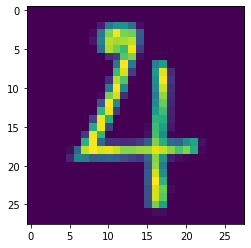

In [ ]:
import urllib.request
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# scale to 28x28 pixels
img = Image.open("digit.jpeg") # FIND A HAND DRAWN DIGIT IMAGE (SHOULD BE SQUARE IN DIMENSIONS) AND UPLOAD IT TO THE NOTEBOOK
img.thumbnail((28, 28))

digit = np.asarray(img, dtype=np.float32)[:, :, 0]

# reshape to a single feature vector
digit = digit.reshape(28,28,1)
digit /= 255
digit = np.ones((28,28,1)) - digit

digit
# store digit into a GPU tensor
x_new = np.zeros((batch_size, 28, 28, 1), dtype=np.float32)
x_new[0,:] = digit
#
plt.figure(2)
plt.imshow(x_new[0].reshape(28,28))
print('Predicted digit:',np.argmax(model.predict(x_new[0:1])))

In [ ]:
model.evaluate(
    x=x_test, y=y_test, batch_size=batch_size, verbose=1
)

313/313 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9897


[0.037430163472890854, 0.9897000193595886]